In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cicids-2017/wednesday_plus.csv
/kaggle/input/cicids-2017/thursday_plus.csv
/kaggle/input/cicids-2017/friday_plus.csv
/kaggle/input/cicids-2017/tuesday.csv
/kaggle/input/cicids-2017/monday.csv
/kaggle/input/cicids-2017/friday.csv
/kaggle/input/cicids-2017/wednesday.csv
/kaggle/input/cicids-2017/thursday.csv
/kaggle/input/cicids-2017/tuesday_plus.csv
/kaggle/input/cicids-2017/monday_plus.csv


In [ ]:
#USER - SAIKIRAN
#import Libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Load and prepare Data 
import pandas as pd

# Load dataset
data = pd.read_csv('/kaggle/input/cicids-2017/friday_plus.csv')

# Select top features from Decision Tree
selected_features = [
    'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
    'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
    'Fwd Packet Length Max', 'Fwd Packet Length Mean', 'Bwd Packet Length Max',
    'Bwd Packet Length Mean', 'Flow Bytes/s', 'Flow Packets/s',
    'Flow IAT Mean', 'Fwd IAT Mean', 'Bwd IAT Mean',
    'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
    'SYN Flag Count', 'FIN Flag Count', 'ACK Flag Count', 'RST Flag Count',
    'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg'
]

# Features and target
X = data[selected_features]
y = data['Label']

# Encode target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [11]:
# train-test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)


In [13]:
#Initialize Random Forest
rf = RandomForestClassifier(
    n_estimators=100,  # number of trees
    max_depth=10,      # depth of each tree
    random_state=42,   # reproducible results
    n_jobs=-1          # use all CPU cores
)


In [15]:
# Train the Model
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

Accuracy: 0.9985937614142743
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86564
           1       1.00      1.00      1.00       221
           2       0.99      0.97      0.98      1220
           3       1.00      1.00      1.00     28543
           4       1.00      1.00      1.00     47720

    accuracy                           1.00    164268
   macro avg       1.00      0.99      1.00    164268
weighted avg       1.00      1.00      1.00    164268



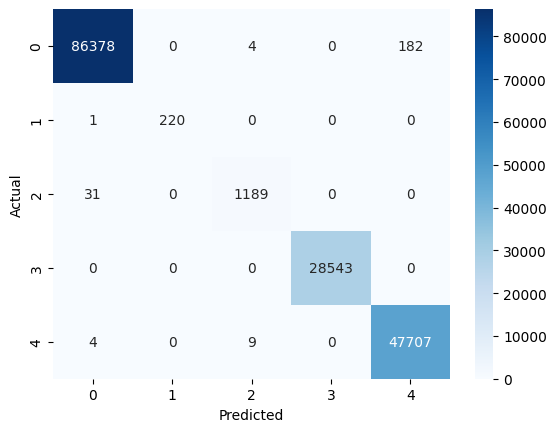

In [18]:
# Evaluate the  Model
# Predict on test set
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


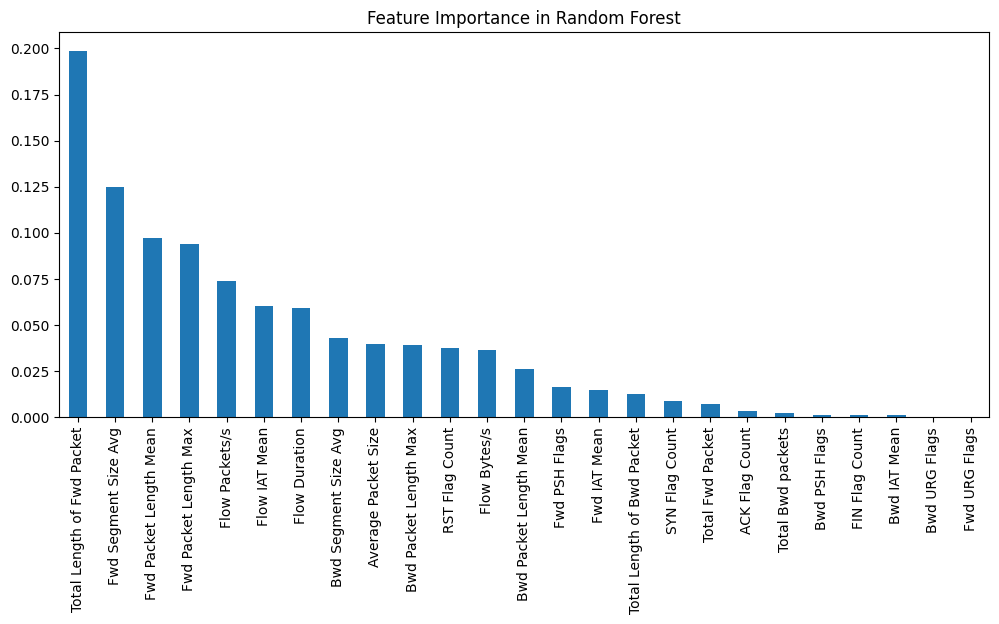

In [20]:
# Feature Extraction- which feature contributes the most 
import pandas as pd

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,5))
plt.title("Feature Importance in Random Forest")
plt.show()


In [22]:
# Comparsion of Decision Tree and Random Forest Results
import pandas as pd

# Example metrics for Decision Tree (replace with your actual results)
dt_metrics = {
    'Accuracy': 0.9997,
    'Macro Recall': 1.00,
    'Macro F1-score': 1.00
}

# Metrics for Random Forest
rf_metrics = {
    'Accuracy': 0.9986,
    'Macro Recall': 0.99,
    'Macro F1-score': 0.995
}

# Combine into DataFrame
comparison = pd.DataFrame([dt_metrics, rf_metrics], index=['Decision Tree', 'Random Forest'])
print(comparison)


               Accuracy  Macro Recall  Macro F1-score
Decision Tree    0.9997          1.00           1.000
Random Forest    0.9986          0.99           0.995


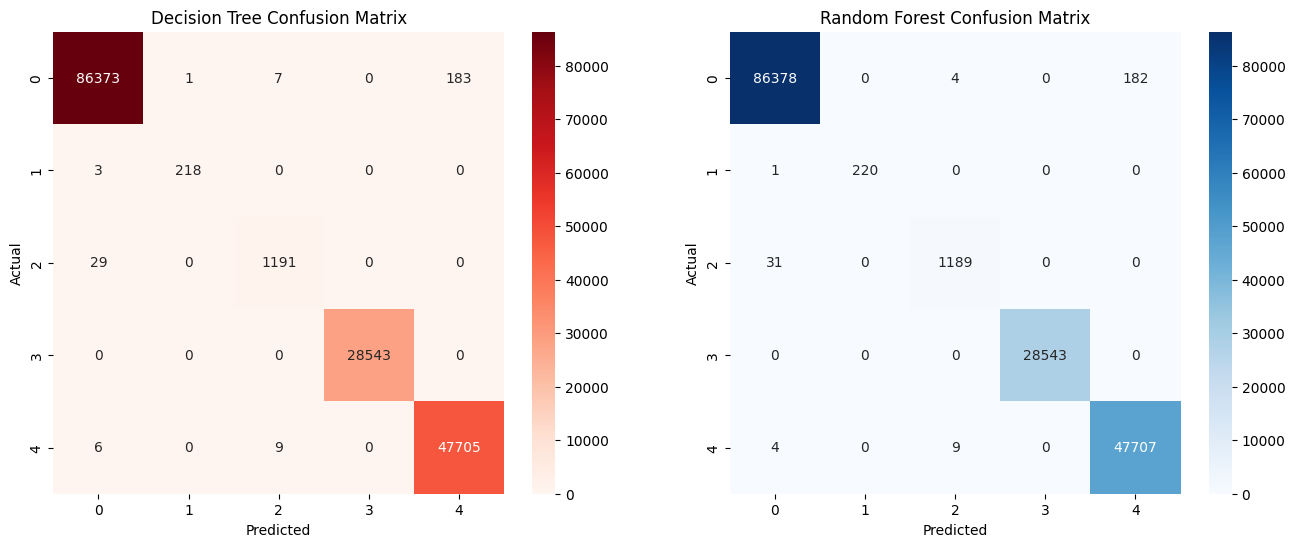

In [25]:
# Comparsion of Confusion Matrix side by side 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Initialize and train
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

# Predictions
dt_pred = dt.predict(X_test)

# Now you can also define rf_pred
rf_pred = rf.predict(X_test)


# Confusion matrices
cm_dt = confusion_matrix(y_test, dt_pred)  # Decision Tree predictions
cm_rf = confusion_matrix(y_test, rf_pred)  # Random Forest predictions

fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds', ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()


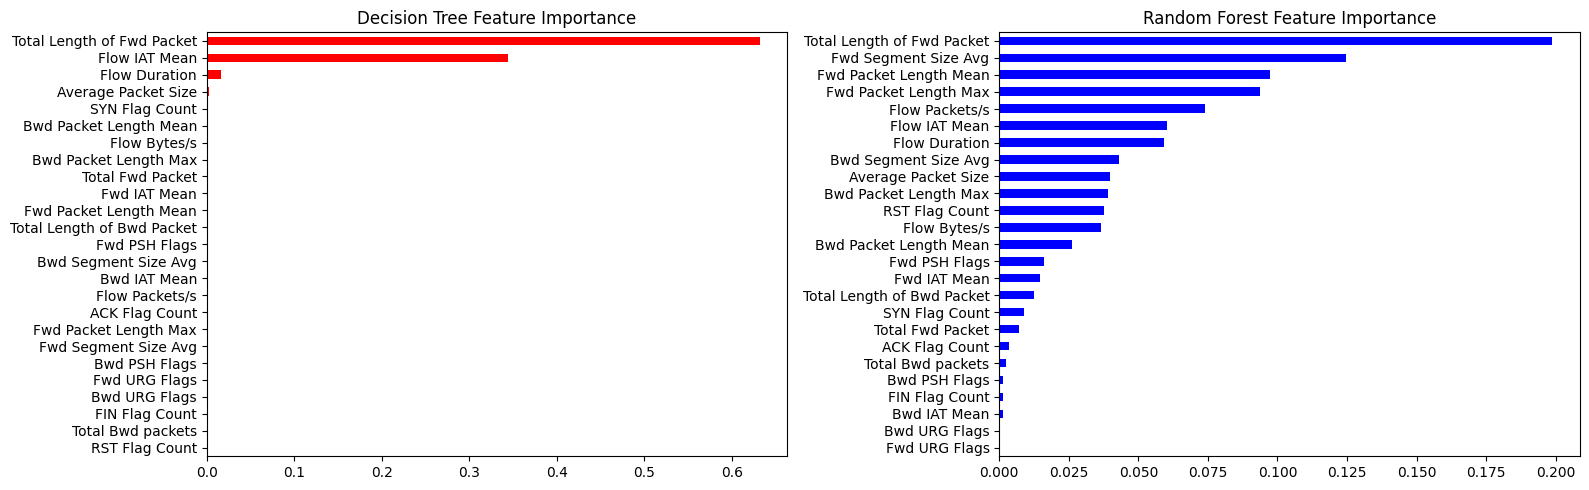

In [28]:
# Comparing the feature Importance 
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Train Decision Tree (same max_depth as before)
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

# Get feature importances
dt_importances = pd.Series(dt.feature_importances_, index=X_train.columns)

fig, axes = plt.subplots(1, 2, figsize=(16,5))

rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Now you can plot
rf_importances.sort_values().plot(kind='barh', ax=axes[1], color='blue', title="Random Forest Feature Importance")

# Decision Tree
dt_importances.sort_values().plot(kind='barh', ax=axes[0], color='red', title="Decision Tree Feature Importance")

# Random Forest
rf_importances.sort_values().plot(kind='barh', ax=axes[1], color='blue', title="Random Forest Feature Importance")

plt.tight_layout()
plt.show()
